<a href="https://colab.research.google.com/github/Heba2424/Housing_Regreission_Model/blob/master/House_Price_Finally_finally.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import the main Libraries

In [ ]:
!pip install sklearn_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## other
import missingno as msno
import os

## split dataset
from sklearn.model_selection import train_test_split

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline ,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

## Models
from sklearn.linear_model import LinearRegression, SGDRegressor

## Metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve

## Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###Load the Data ana Look at the big picture

In [ ]:
df_housing = pd.read_csv('housing.csv')
df_housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
## check the nulls
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#Exploratory Data Analysis (EDA)

In [ ]:
# Explorre the coulmn .......
ocean_proximity = df_housing['ocean_proximity'].value_counts()
ocean_proximity
#ocean_proximity

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

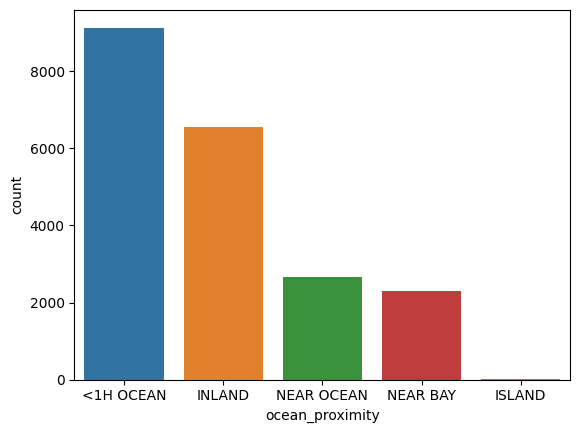

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.countplot(x = 'ocean_proximity' ,data= df_housing, order= ocean_proximity.index)
plt.figure(figsize=(10, 6))
plt.show()

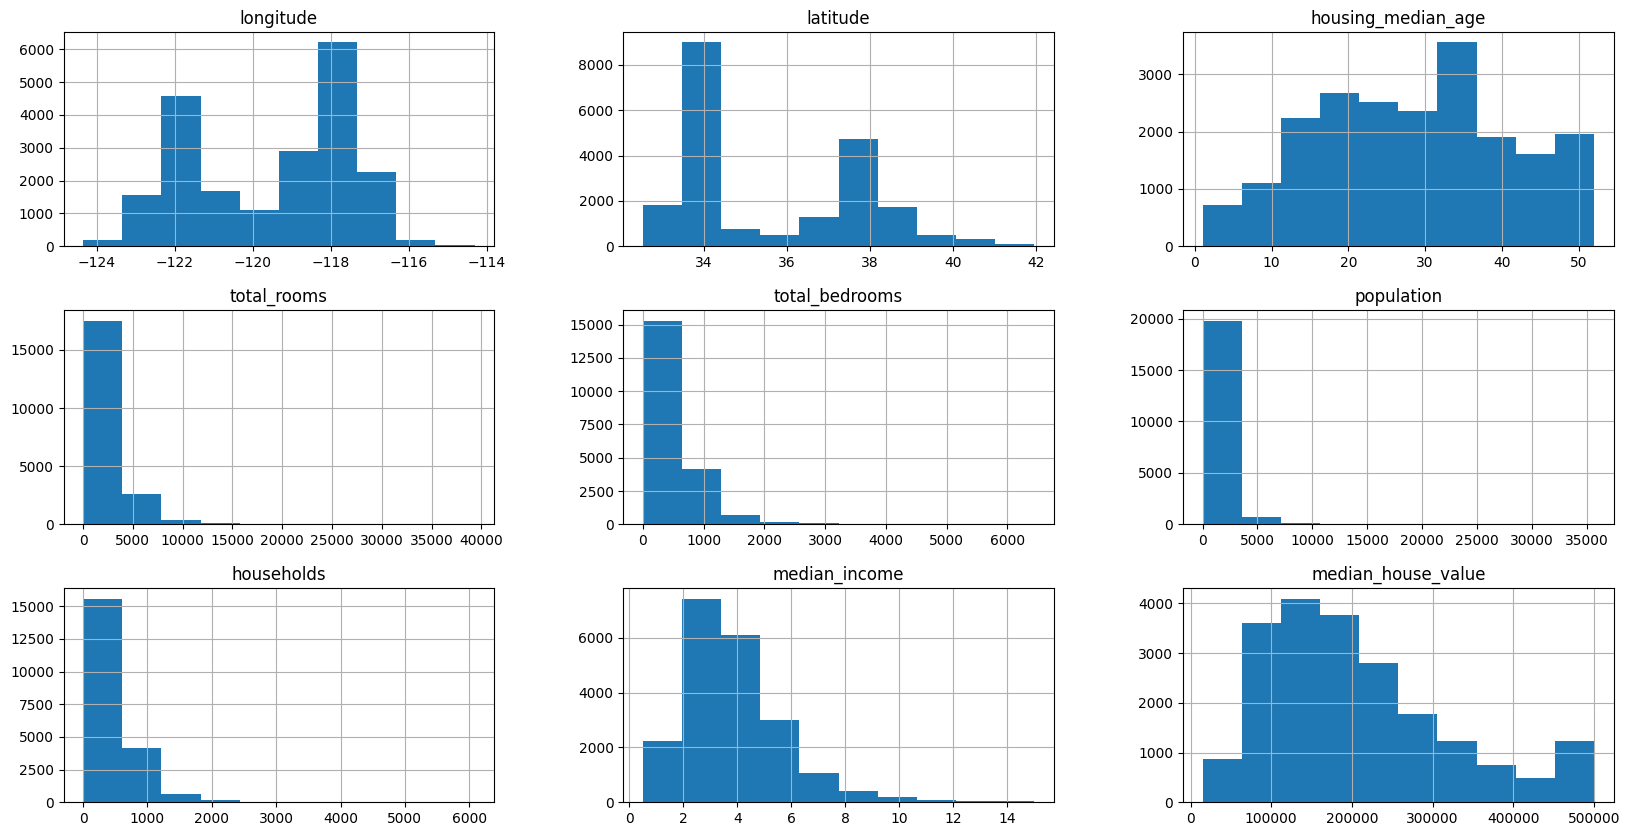

In [ ]:
# histogram for dataset
df_housing.hist(bins=10 , figsize=(20,10))
plt.show()

In [ ]:
df_housing[df_housing['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

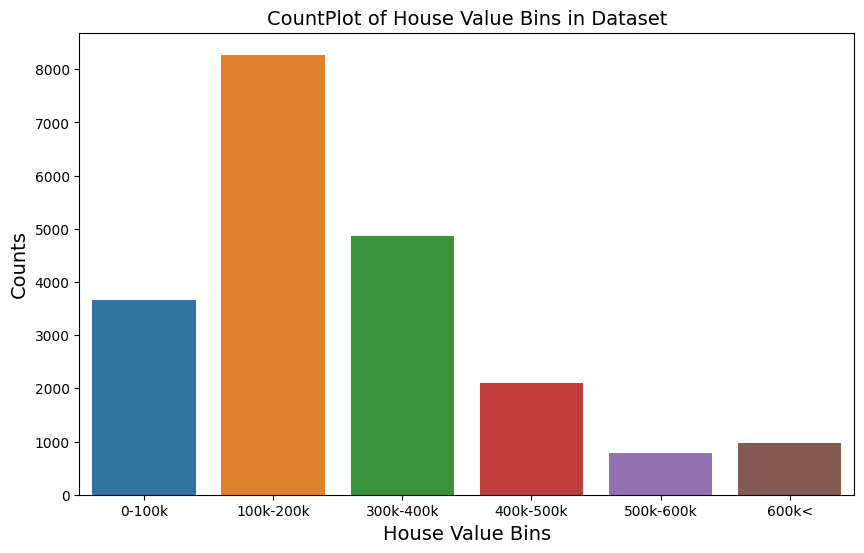

In [ ]:
## Try for (median_house_value) to convert it to chunks (bins)
## Cut this numerical feature to categorical for its values to be in range will be in the same category
## In the following example -- any value between range (0-100k) will be the same category, I name it (0-100k)
house_value_bins = pd.cut(x=df_housing['median_house_value'],
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

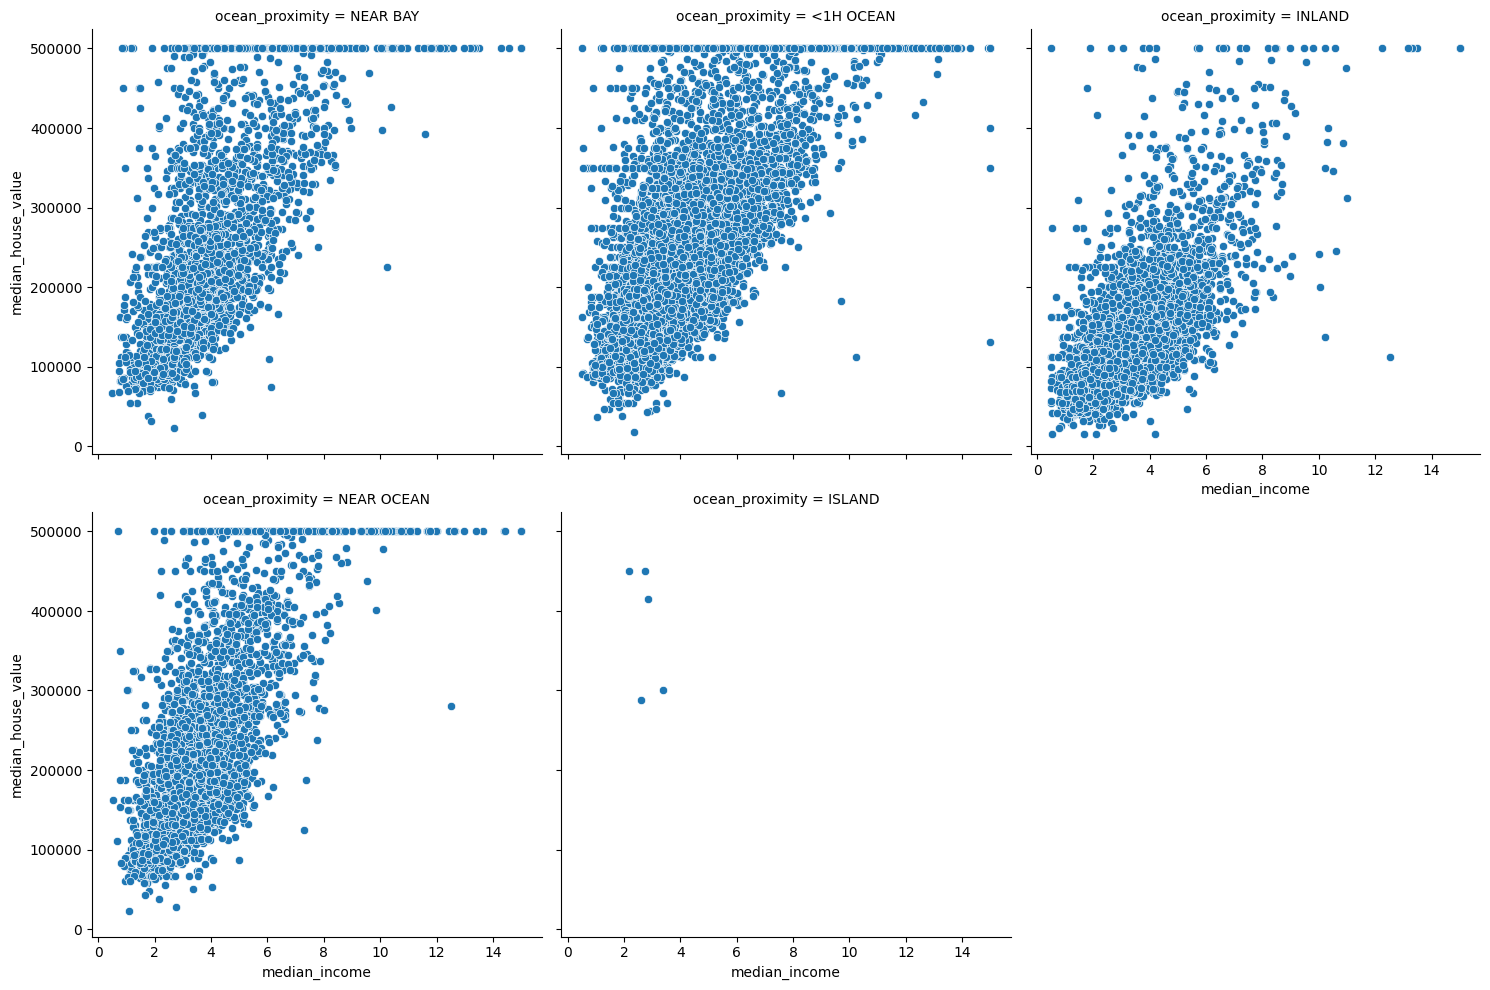

In [ ]:
## Scatter plot with (median_income) and (median_house_value) at each (ocean_proximity)
sns.relplot(x= 'median_income' ,y ='median_house_value' ,data=df_housing , col='ocean_proximity',col_wrap=3)
plt.show()

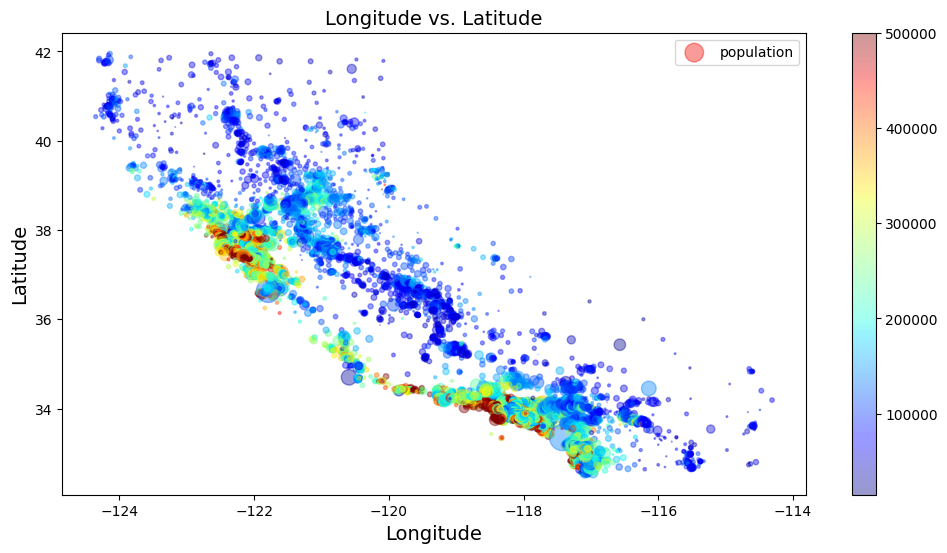

In [ ]:
## scatter plot for (longitude ,latitude), and add popluation as a size of the point and the color as (house_value)

plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df_housing['longitude'] , y =df_housing['latitude'] , s=df_housing['population']/100 ,
            c= df_housing['median_house_value'] ,cmap = plt.get_cmap('jet') ,alpha=0.4 ,label = 'population')

plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.colorbar(sc)
plt.legend()
plt.show()

##Check the Correlation between the Features and the Target

In [ ]:
## Correlation (person correlation)
df_housing.corr()['median_house_value'].sort_values(ascending = False)

<ipython-input-14-209e34ae1deb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_housing.corr()['median_house_value'].sort_values(ascending = False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<ipython-input-15-4eec7be62489>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df_housing.corr(), annot=True)


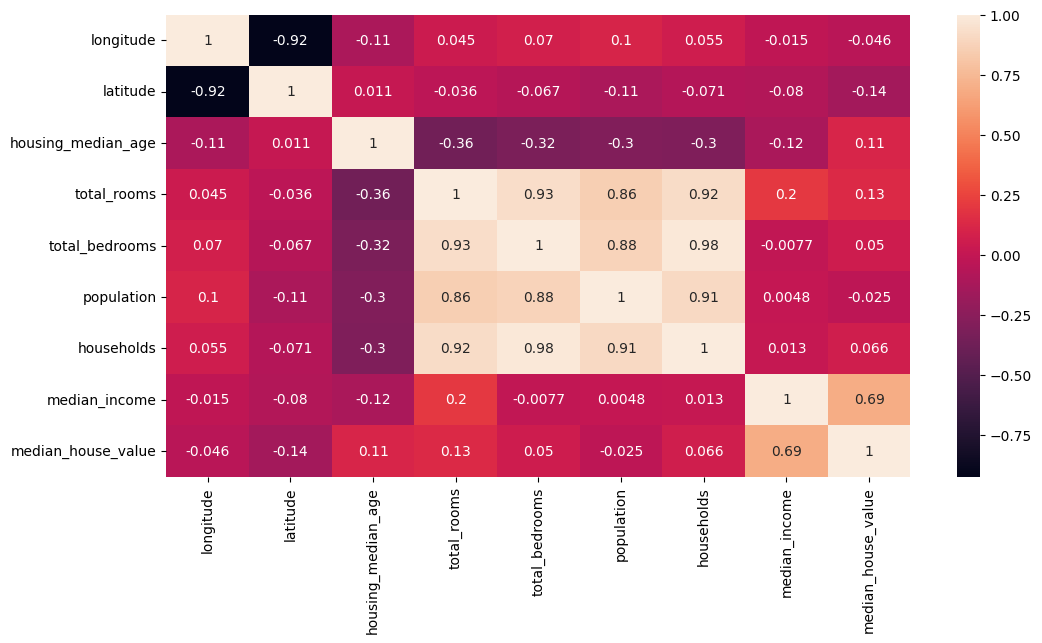

In [ ]:
## you can show this as heatmap
plt.figure(figsize=(12,6))
sns.heatmap( df_housing.corr(), annot=True)

plt.show()

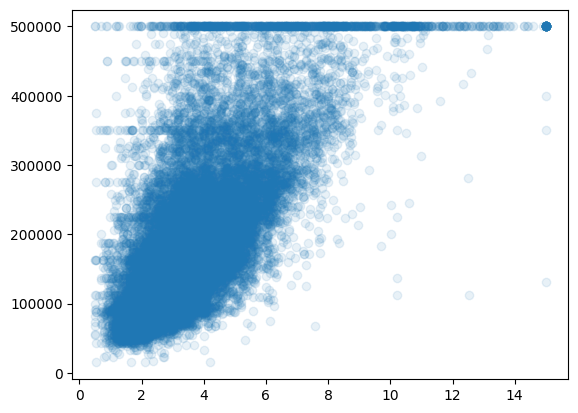

In [ ]:
## check scatter plot between .....
plt.scatter(df_housing['median_income'], df_housing['median_house_value'] , alpha=0.1)
plt.show()

#Feature Engineering

In [ ]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [ ]:
## Correlation (person correlation)
df_housing.corr()['median_house_value'].sort_values(ascending = False)

<ipython-input-18-209e34ae1deb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_housing.corr()['median_house_value'].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

## Detecting Outliers and Remove it

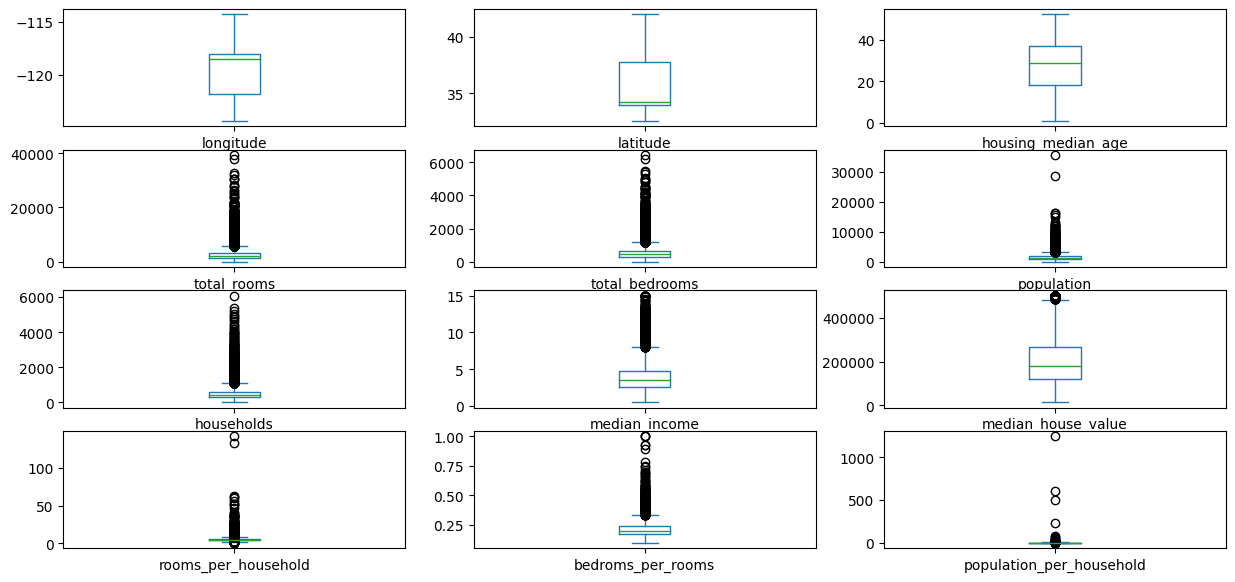

In [ ]:
df_housing.plot(kind='box', subplots=True, layout=(4,3), figsize=(15,7))
plt.show()

In [ ]:
# Most of outlier are important for us so we can remove data bigger than 95% of column
df_housing=df_housing[df_housing['total_rooms'] < df_housing['total_rooms'].quantile(0.95)]
df_housing=df_housing[df_housing['population']<df_housing['population'].quantile(0.95)]
df_housing=df_housing[df_housing['total_bedrooms']<df_housing['total_bedrooms'].quantile(0.95)]
df_housing=df_housing[df_housing['households']<df_housing['households'].quantile(0.95)]
df_housing=df_housing[df_housing['rooms_per_household']<df_housing['rooms_per_household'].quantile(0.95)]
df_housing=df_housing[df_housing['bedroms_per_rooms']<df_housing['bedroms_per_rooms'].quantile(0.95)]
df_housing=df_housing[df_housing['population_per_household']<df_housing['population_per_household'].quantile(0.95)]

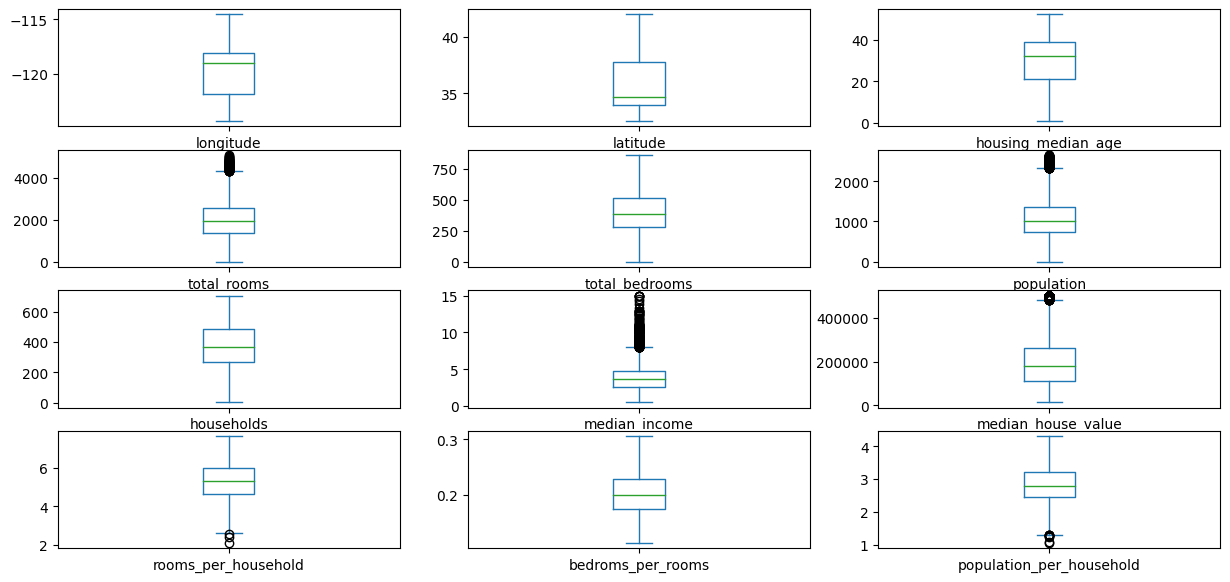

In [ ]:
df_housing.plot(kind='box', subplots=True, layout=(4,3), figsize=(15,7))
plt.show()

#Split the Dataset

In [ ]:
X = df_housing.drop(columns='median_house_value')
y = df_housing['median_house_value']

In [ ]:
df_housing.shape

(14260, 13)

In [ ]:
'''
## Random split the dataset to two sets (train_set, valid_set, test_set)
## Firstly split to (train_full_set, test_set) then split (train_full_set) to (train_set, valid_set)
## Firstly
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
## secondly
#X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, shuffle=True)

## check shape
print('X_train shape -- ', X_train_full.shape)
print('y_train shape -- ', y_train_full.shape)
#print('X_valid shape -- ', X_valid.shape)
#print('y_valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)'''

"\n## Random split the dataset to two sets (train_set, valid_set, test_set)\n## Firstly split to (train_full_set, test_set) then split (train_full_set) to (train_set, valid_set)\n## Firstly\nX_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)\n## secondly\n#X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, shuffle=True)\n\n## check shape\nprint('X_train shape -- ', X_train_full.shape)\nprint('y_train shape -- ', y_train_full.shape)\n#print('X_valid shape -- ', X_valid.shape)\n#print('y_valid shape -- ', y_valid.shape)\nprint('X_test shape -- ', X_test.shape)\nprint('y_test shape -- ', y_test.shape)"

#Dealing with nulls

In [ ]:
## Separete the columns according to type (numerical or categorical)

num_cols = [col for col in X.columns if X[col].dtype in ['float64', 'int64' ,'float32', 'int32']]

categ_cols = [col for col in X.columns if X[col].dtype not in ['float64', 'int64' ,'float32', 'int32']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
************************************************************
Categorical Columns : 
 ['ocean_proximity']


#Pipline of all Together

In [ ]:
## numerical pipeline

num_pipline = Pipeline(steps=[
    ('selector' , DataFrameSelector(num_cols)),
    ('imputer' , SimpleImputer(strategy='median')),
    ('scaler' , StandardScaler())
])


## categorical pipeline
categ_pipline = Pipeline(steps=[
    ('selector' , DataFrameSelector(categ_cols)),
    ('imputer' , SimpleImputer(strategy='constant' , fill_value='missing')),
    ('ohe' , OneHotEncoder(sparse=False))
])


## concatenate both two pipelines
total_pipline = FeatureUnion(transformer_list=[
    ('num_pipline' , num_pipline),
    ('categ_pipline' , categ_pipline)
])



X_final = total_pipline.fit_transform(X)
#X_valid_final = total_pipline.transform(X_valid)
#X_test_full_final = total_pipline.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Splite Data to Train and Valid

In [ ]:
## secondly
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)
## check shape
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_valid shape -- ', X_test.shape)
print('y_valid shape -- ', y_test.shape)

X_train shape --  (9554, 16)
y_train shape --  (9554,)
X_valid shape --  (4706, 16)
y_valid shape --  (4706,)


#Building ML Models

##Evaluation Metric: RMSE

##LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)   ## train

LinearRegression()

In [ ]:
#y_pred = reg.predict(X_train)

y_pred_train_lin = lin_reg.predict(X_train)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_train_lin = (mean_squared_error(y_train , y_pred_train_lin))**0.5  ## route

## R2 score
r2_train_lin = r2_score(y_train, y_pred_train_lin)


print(f'RMSE for training set using LinearRegrssion {rmse_train_lin :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_train_lin :.3f}')

RMSE for training set using LinearRegrssion 62489.172
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.692


In [ ]:
## prdiction
y_pred_train_lin = lin_reg.predict(X_train)

## Cross_Validation train for RMSE
scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rmse_lig_train = np.sqrt(-scores).mean()

## Cross_Validation for R2_Score
scores =cross_val_score(lin_reg,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
r2_lig_train = np.sqrt(scores).mean()

test_score = lin_reg.score(X_test,y_test)
print(f'RMSE for training set using LinearRegrssion {rmse_lig_train :.3f}')
print("**" * 50)
print(f'R2 Score score for training set using LinearRegrssion {r2_lig_train :.3f}')

RMSE for training set using LinearRegrssion 62660.108
****************************************************************************************************
R2 Score score for training set using LinearRegrssion 0.831


In [ ]:
some_data = df_housing.iloc[:5]
some_labels = df_housing['median_house_value'].iloc[:5]

some_data_prepared = total_pipline.transform(some_data)

predict = lin_reg.predict(X_test)

predict = pd.DataFrame(predict).rename(columns={0:"predicted house value"})
some_labels = some_labels.reset_index().drop(columns="index")

#print("Predictions: ", lin_reg.predict(some_data_prepared))
#print("Labels: ", list(some_labels))

In [ ]:
y_predict_i = pd.concat([predict, some_labels], axis=1)
y_predict_i.head(5)

,predicted house value,median_house_value
0,240886.687381,452600.0
1,118117.784745,341300.0
2,288594.790629,342200.0
3,390946.934474,269700.0
4,215515.360515,299200.0


### `KNN`
* `My evaluation metric is RMSE`

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=4, p=2, metric='minkowski')
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_pred_train_knn = knn_reg.predict(X_train)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_train_knn = (mean_squared_error(y_train , y_pred_train_knn))**0.5  ## route

## R2 score
r2_train_knn = r2_score(y_train, y_pred_train_knn)


print(f'RMSE for training set using LinearRegrssion {rmse_train_knn :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_train_knn :.3f}')

RMSE for training set using LinearRegrssion 45816.436
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.835


In [ ]:
## prdiction
y_pred_train_knn = knn_reg.predict(X_train)

## Cross_Validation for RMSE
scores = cross_val_score(knn_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rmse_knn_train = np.sqrt(-scores).mean()

## Cross_Validation for R2_Score
scores =cross_val_score(knn_reg,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
r2_knn_train = np.sqrt(scores).mean()


print(f'RMSE for training set using KNN {rmse_knn_train :.3f}')
print("**" * 50)
print(f'R2 Score score for training set using KNN {r2_knn_train :.3f}')

RMSE for training set using KNN 60310.253
****************************************************************************************************
R2 Score score for training set using KNN 0.845


In [ ]:
y_pred_test_knn = knn_reg.predict(X_test)

## RMSE
rmse_test_knn = (mean_squared_error(y_test, y_pred_test_knn))**0.5

print(f'RMSE for Testing set using KNN -- {rmse_test_knn:.3f}')

RMSE for Testing set using KNN -- 60053.513


# Tuning KNN using GridSearchCV

In [ ]:
## Tuning using GridSearchCV
options=['uniform', 'distance']
params_knn = {'n_neighbors': np.arange(1,31,1),
              'p': [1, 2]}

## Scoring is the same as we did in Cross validation
grid_knn = GridSearchCV(estimator=knn_reg,
                        param_grid=params_knn,
                        cv=10,
                        n_jobs=-1,
                        scoring='neg_mean_squared_error',
                        verbose=6)

grid_knn.fit(X_train, y_train)   ## train

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=4), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=6)

In [ ]:
best_parms_knn = grid_knn.best_params_
print('Best Parameter using KNN -- ', best_parms_knn)

print('---'*30)

knn_best = grid_knn.best_estimator_
print('Best Estimaror using KNN -- ', knn_best)

print ('---' * 30)

## Using knn_best

## prediction
y_pred_train_knn = knn_best.predict(X_train)
y_pred_test_knn = knn_best.predict(X_test)

## RMSE
rmse_train_knn = (mean_squared_error(y_train, y_pred_train_knn))**0.5
rmse_test_knn = (mean_squared_error(y_test, y_pred_test_knn))**0.5

print(f'RMSE for training set using KNN -- {rmse_train_knn:.3f}')
print(f'RMSE for Testing set using KNN -- {rmse_test_knn:.3f}')

Best Parameter using KNN --  {'n_neighbors': 12, 'p': 2}
------------------------------------------------------------------------------------------
Best Estimaror using KNN --  KNeighborsRegressor(n_neighbors=12)
------------------------------------------------------------------------------------------
RMSE for training set using KNN -- 52667.088
RMSE for Testing set using KNN -- 58739.561


In [ ]:
## prdiction
y_pred_train_knn = grid_knn.predict(X_train)

## Cross_Validation for RMSE
scores = cross_val_score(grid_knn, X_train, y_train,scoring="neg_mean_squared_error", cv=5)
rmse_knn_train = np.sqrt(-scores).mean()

## Cross_Validation for R2_Score
scores =cross_val_score(grid_knn,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
r2_knn_train = np.sqrt(scores).mean()


print(f'RMSE for training set using KNN {rmse_knn_train :.3f}')
print("**" * 50)
print(f'R2 Score score for training set using KNN {r2_knn_train :.3f}')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Fitting 10 folds for each of 60 candidates, totalling 600 fits
RMSE for training set using KNN 58332.074
****************************************************************************************************
R2 Score score for training set using KNN 0.855


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
## prdiction
y_pred_train_tree = tree_reg.predict(X_train)

## Cross_Validation for RMSE
scores = cross_val_score(tree_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rmse_tree_train = np.sqrt(-scores).mean()

## Cross_Validation for R2_Score
scores =cross_val_score(tree_reg,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
r2_tree_train = np.sqrt(scores).mean()


print(f'RMSE for training set using Decision Tree {rmse_tree_train :.3f}')
print("**" * 50)
print(f'R2 Score score for training set using Decision Tree {r2_tree_train :.3f}')

RMSE for training set using Decision Tree 69478.431
****************************************************************************************************
R2 Score score for training set using Decision Tree 0.775


In [ ]:
y_pred_test_lin = tree_reg.predict(X_test)

## RMSE
rmse_test_tree = (mean_squared_error(y_test, y_pred_test_lin))**0.5

print(f'RMSE for Testing set using KNN -- {rmse_test_tree:.3f}')

RMSE for Testing set using KNN -- 71247.574


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Train the model using the training sets
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_train_forest = random_forest.predict(X_train)


## RMSE
rmse_train_rand = (mean_squared_error(y_train , y_pred_train_forest))**0.5

## R2 score
r2_train_rand = r2_score(y_train, y_pred_train_forest)


print(f'RMSE for training set using RandomForest {rmse_train_rand :.3f}')
print("**" * 50)
print(f'R2 score for training set using RandomForest {r2_train_rand :.3f}')

RMSE for training set using RandomForest 17959.728
****************************************************************************************************
R2 score for training set using RandomForest 0.975


In [ ]:
## prdiction
y_pred_train_forest = random_forest.predict(X_train)

## Cross_Validation for RMSE
scores = cross_val_score(tree_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rmse_forest_train = np.sqrt(-scores).mean()

## Cross_Validation for R2_Score
scores =cross_val_score(tree_reg,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
r2_forest_train = np.sqrt(scores).mean()


print(f'RMSE for training set using Random Forest {rmse_forest_train :.3f}')
print("**" * 50)
print(f'R2 Score score for training set using Random Forest {r2_forest_train :.3f}')

RMSE for training set using Random Forest 69408.464
****************************************************************************************************
R2 Score score for training set using Random Forest 0.778


In [ ]:
y_pred_train_forest = random_forest.predict(X_train)


## RMSE
rmse_train_rand = (mean_squared_error(y_train , y_pred_train_forest))**0.5

## R2 score
r2_train_rand = r2_score(y_train, y_pred_train_forest)


print(f'RMSE for training set using RandomForest {rmse_train_rand :.3f}')
print("**" * 50)
print(f'R2 score for training set using RandomForest {r2_train_rand :.3f}')

RMSE for training set using RandomForest 17959.728
****************************************************************************************************
R2 score for training set using RandomForest 0.975


## Tuning Random Forest

In [ ]:
params_forest = {'max_depth': [2,4,8,9],
                 'n_estimators': [300,350,400]
                }

## Define the Model
grid_forest = GridSearchCV(estimator=random_forest,
                        param_grid=params_forest,
                           scoring='neg_mean_squared_error' ,verbose=6,
                           cv=5, n_jobs=-1 )


grid_forest.fit(X_train, y_train)  ## fit

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 9],
                         'n_estimators': [300, 350, 400]},
             scoring='neg_mean_squared_error', verbose=6)

In [ ]:
best_parms_forest = grid_forest.best_params_
print('Best Parameter using Random Forset -- ', best_parms_forest)

print('---'*30)

forest_best = grid_forest.best_estimator_
print('Best Estimaror using Random Forset -- ', forest_best)

print ('---' * 30)

## Using forest_best

## prediction
y_pred_train_forest = forest_best.predict(X_train)

## RMSE
rmse_train_forest = (mean_squared_error(y_train, y_pred_train_forest))**0.5   ## RMSE

print(f'RMSE for training set using Random Forset -- {rmse_train_forest:.3f}')

Best Parameter using Random Forset --  {'max_depth': 9, 'n_estimators': 400}
------------------------------------------------------------------------------------------
Best Estimaror using Random Forset --  RandomForestRegressor(max_depth=9, n_estimators=400, random_state=42)
------------------------------------------------------------------------------------------
RMSE for training set using Random Forset -- 41129.558


In [ ]:
best_parms_forest = grid_forest.best_params_
print('Best Parameter using Random Forset -- ', best_parms_forest)

print('---'*30)

forest_best = grid_forest.best_estimator_
print('Best Estimaror using Random Forset -- ', forest_best)

print ('---' * 30)

## Using forest_best


## prediction
y_pred_train_forest = forest_best.predict(X_train)
y_pred_test_forest = forest_best.predict(X_test)

## RMSE
rmse_train_forest = (mean_squared_error(y_train, y_pred_train_forest))**0.5
rmse_test_forest = (mean_squared_error(y_test, y_pred_test_forest))**0.5

print(f'RMSE for training set using Random Forset -- {rmse_train_forest:.3f}')
print(f'RMSE for testing set using Random Forset -- {rmse_test_forest:.3f}')

Best Parameter using Random Forset --  {'max_depth': 9, 'n_estimators': 400}
------------------------------------------------------------------------------------------
Best Estimaror using Random Forset --  RandomForestRegressor(max_depth=9, n_estimators=400, random_state=42)
------------------------------------------------------------------------------------------
RMSE for training set using Random Forset -- 41129.558
RMSE for testing set using Random Forset -- 52930.020


In [ ]:
## prdiction
y_pred_train_forest = grid_forest.predict(X_train)

## Cross_Validation for RMSE
scores = cross_val_score(grid_forest, X_train, y_train,scoring="neg_mean_squared_error", cv=5)
rmse_forest_train = np.sqrt(-scores).mean()

## Cross_Validation for R2_Score
scores =cross_val_score(grid_forest,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
r2_forest_train = np.sqrt(scores).mean()


print(f'RMSE for training set using Random Forest {rmse_forest_train :.3f}')
print("**" * 50)
print(f'R2 Score score for training set using Random Forest {r2_forest_train :.3f}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
RMSE for training set using Random Forest 52358.893
****************************************************************************************************
R2 Score score for training set using Random Forest 0.885


In [ ]:
y_pred_test_random = forest_best.predict(X_test)

## RMSE
rmse_test_random = (mean_squared_error(y_test, y_pred_test_random))**0.5

## R2_score
scores = cross_val_score(random_forest,X_test,y_test,n_jobs=-1,cv=5,scoring='r2')
r2_test_random = np.sqrt(scores).mean()

print(f'RMSE for Testing set using Random Forset -- {rmse_test_random:.3f}')
print(f'R2 score for Testing set using RandomForest {r2_test_random :.3f}')

RMSE for Testing set using Random Forset -- 52930.020
R2 score for Testing set using RandomForest 0.873


In [ ]:
scores=cross_val_score(random_forest,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.8994446939723014


# Final Prediction

In [ ]:
results = pd.DataFrame(zip(y_test, y_pred_test_random, round(y_test - y_pred_test_random)/10000), columns = ['Actual', 'Prediction', 'error'])
results.head(5)

,Actual,Prediction,error
0,255900.0,199393.628595,5.6506
1,143800.0,139400.526972,0.4399
2,265500.0,250554.740707,1.4945
3,405200.0,403103.775332,0.2096
4,237500.0,237985.347599,-0.0485


In [ ]:
0